# Airlines visualizations

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('seaborn-v0_8')
df = pd.read_csv('airline_passenger_satisfaction.csv')

### I started off by importing the liberaries that i need or will need for this task

In [2]:
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


### I noticed that not all the columns are showing so i'll use the pd.set_options to show them 

In [3]:
pd.set_option('display.max_columns',24)

In [4]:
df.head(10)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied
5,6,Male,43,Returning,Business,Business,3788,0,0.0,4,4,3,5,4,4,4,4,3,3,4,4,4,4,Satisfied
6,7,Male,43,Returning,Business,Business,1963,0,0.0,3,3,4,4,3,5,5,5,4,5,5,3,5,5,Satisfied
7,8,Female,60,Returning,Business,Business,853,0,3.0,3,4,3,4,4,3,4,4,4,4,3,4,3,3,Satisfied
8,9,Male,50,Returning,Business,Business,2607,0,0.0,1,1,3,2,1,4,3,4,3,3,4,4,4,4,Neutral or Dissatisfied
9,10,Female,38,Returning,Business,Business,2822,13,0.0,2,5,3,5,2,5,4,5,4,2,5,2,5,5,Satisfied


## Cleaning 

### I will start my cleaning by showing some general proberities of the data using the .info() method

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

### After getting some info about the data i noticed that there are some NULL values in the Arrival Delay column 

In [6]:
df['Arrival Delay'].isna().sum()

393

In [7]:
df['Arrival Delay'].value_counts()

Arrival Delay
0.0       72753
1.0        2747
2.0        2587
3.0        2442
4.0        2373
          ...  
1011.0        1
386.0         1
624.0         1
355.0         1
412.0         1
Name: count, Length: 472, dtype: int64

### I used the value_counts() method to determine what is the most common value in this column

In [8]:
df['Arrival Delay'].fillna(0,inplace= True)

/tmp/ipykernel_68421/2741008955.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Arrival Delay'].fillna(0,inplace= True)


### I replaced all the NULLS with 0 ( the most common value in this column )

In [9]:
assert df['Arrival Delay'].isna().sum() == 0

### The ID column doesn't contribute to the data so i'm going to drop it 

In [10]:
df.drop('ID', axis=1, inplace=True)

In [11]:
df.sample(5)

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
41959,Female,51,Returning,Business,Business,2041,0,0.0,1,5,1,4,1,1,4,1,2,3,1,1,1,1,Neutral or Dissatisfied
4903,Male,26,Returning,Business,Business,1020,0,0.0,3,3,4,4,3,3,4,4,4,4,5,3,4,5,Satisfied
10056,Male,49,Returning,Personal,Business,596,0,0.0,5,0,4,3,1,4,5,0,4,2,4,0,4,4,Satisfied
118825,Female,23,First-time,Business,Economy,325,35,39.0,1,3,2,3,2,2,2,2,2,2,2,3,2,3,Neutral or Dissatisfied
90780,Male,54,Returning,Business,Business,3813,0,0.0,5,5,5,5,5,4,5,4,4,5,4,5,4,4,Satisfied


### Now everything is setup and we can begin visualizing the data

## Visualizations 

## Gender column 

In [12]:
df['Gender'].value_counts()

Gender
Female    65899
Male      63981
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

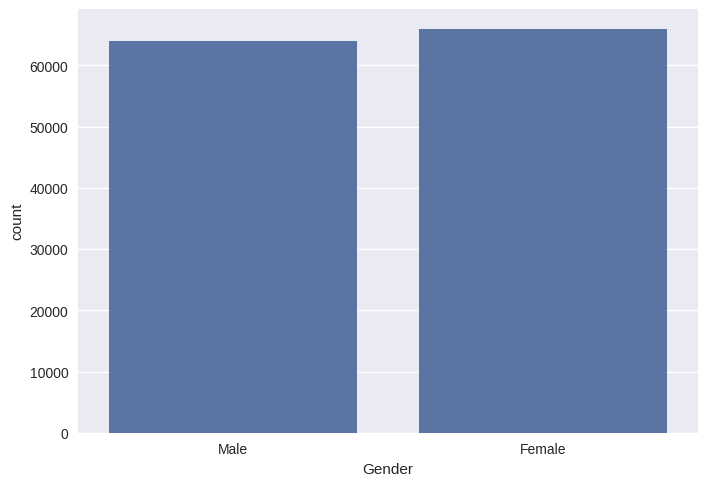

In [13]:
sns.countplot(x='Gender', data=df)

### So from this plot we can conclude that the number of females is slightley higher than males

## Age column

In [14]:
df['Age'].value_counts()

Age
39    3692
25    3511
40    3209
44    3104
41    3089
      ... 
74      61
76      60
79      52
78      44
85      25
Name: count, Length: 75, dtype: int64

<Axes: xlabel='Age'>

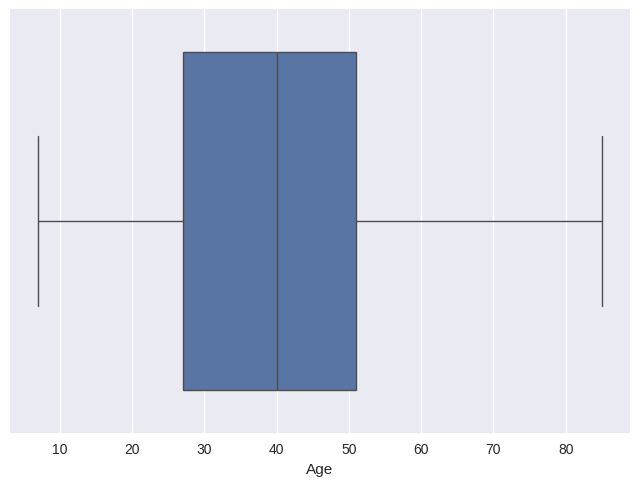

In [15]:
sns.boxplot(x='Age', data=df)

### We can see that all the ages are consistent and there is no outliers

<Axes: xlabel='Age', ylabel='Count'>

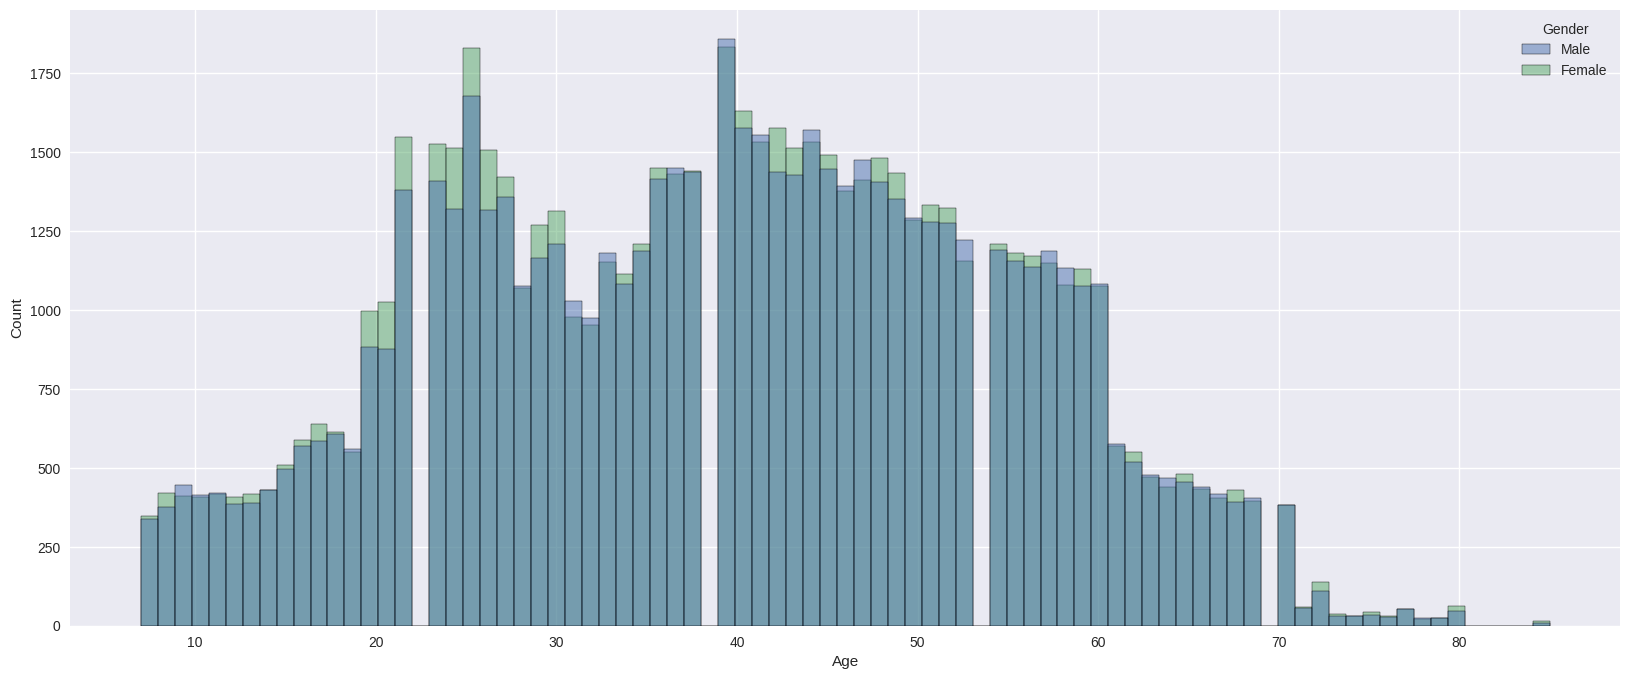

In [16]:
plt.figure(figsize=(20,8))
sns.histplot(x='Age', data=df, hue='Gender')

### From the plot we can see a couple of things :
### First is that the ages are almost normally distributed except for being slightly skwed to the left
### Second is that the percentage of males to females in each age is almost similar
### Third is that people after the age of 70 tend to travel less

## Customer type column 

In [17]:
df['Customer Type'].value_counts()

Customer Type
Returning     106100
First-time     23780
Name: count, dtype: int64

<Axes: xlabel='Customer Type', ylabel='count'>

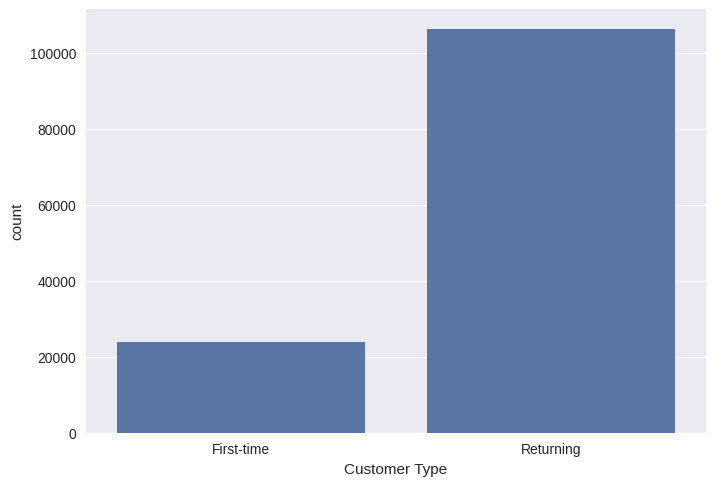

In [18]:
sns.countplot(x='Customer Type', data=df)

### We can see here that the returnning passengers are almost four times larger than the first-time passengers

## Type of travel column

In [19]:
df['Type of Travel'].value_counts()

Type of Travel
Business    89693
Personal    40187
Name: count, dtype: int64

<Axes: xlabel='Type of Travel', ylabel='count'>

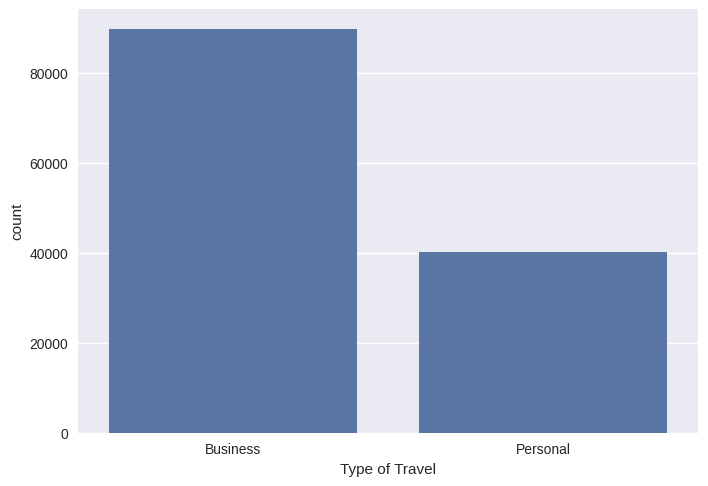

In [20]:
sns.countplot(x='Type of Travel', data=df)

### Looks like there are more people travelling for business purposes than persnoal travelling

## Class column

In [21]:
df['Class'].value_counts()

Class
Business        62160
Economy         58309
Economy Plus     9411
Name: count, dtype: int64

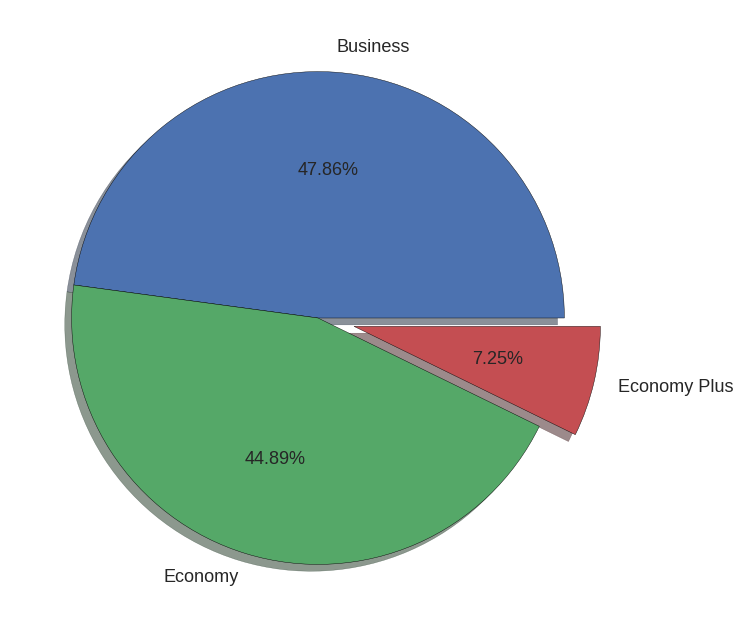

In [22]:
plt.figure(figsize=[8,8])
explode = [0,0,0.15]
labels= df['Class'].value_counts().index
values= df['Class'].value_counts().values
plt.pie(x = values, labels = labels, autopct= '%0.2f%%', wedgeprops = {'edgecolor':'black'},
        textprops ={'fontsize': 13}, shadow=True , explode = explode )
plt.show()

### We can see that the percentages of people flying Economy and Business classes are close to each other with Business class being slightly higher but both of them are way larger than the Economy plus class

<Axes: xlabel='Class', ylabel='count'>

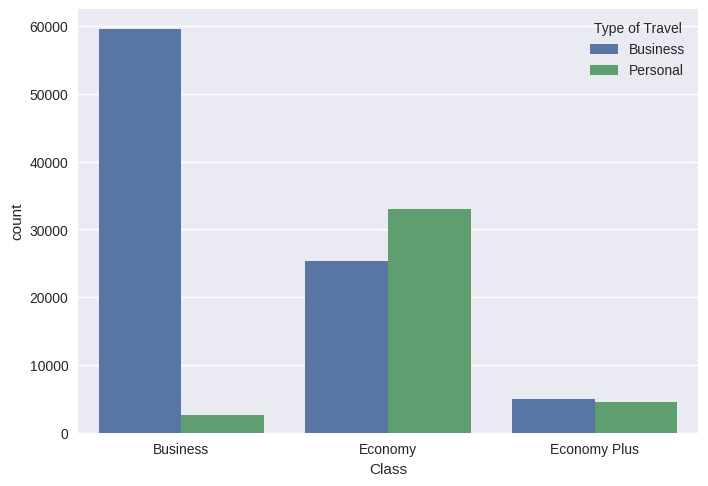

In [23]:
sns.countplot(x='Class', data=df, hue='Type of Travel')

### In this plot we can see that most of the people whom are flying for business are taking the Business class but also a big percentage of them are taking the Economy and Economy plus classes

## Flight Distance column

In [24]:
df['Flight Distance'].value_counts().sort_index()

Flight Distance
31       11
56       11
67      160
73       77
74       42
       ... 
4243     23
4502     14
4817      6
4963     19
4983     16
Name: count, Length: 3821, dtype: int64

<Axes: xlabel='Flight Distance', ylabel='Count'>

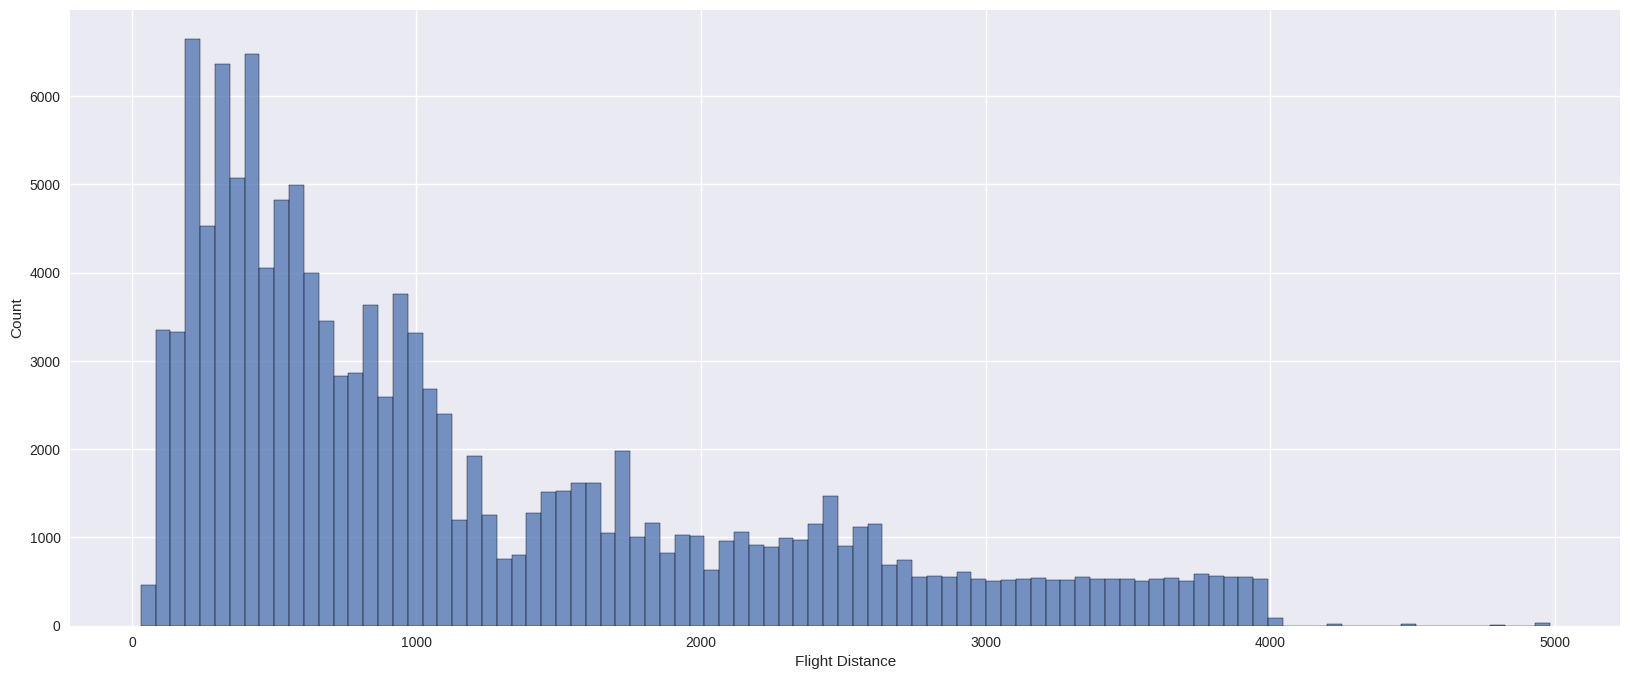

In [25]:
plt.figure(figsize=(20,8))
sns.histplot(x='Flight Distance', data=df)

<Axes: xlabel='Flight Distance', ylabel='Count'>

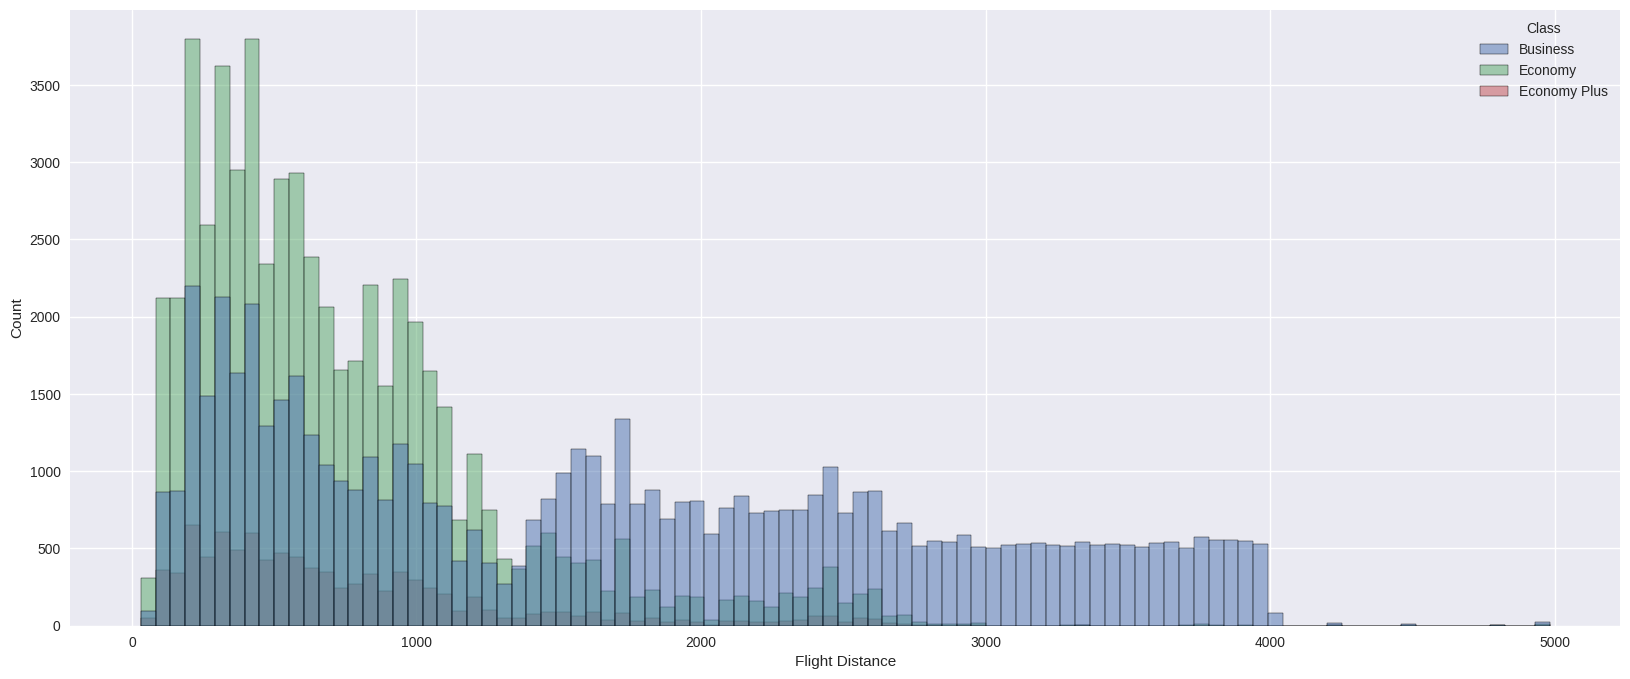

In [26]:
plt.figure(figsize=(20,8))
sns.histplot(x='Flight Distance', data=df,  hue='Class')

### Here we can see a couple of things:
### first is that a larger percentage of people travel less than 1000 miles 
### second is that people who fly shorter distances tend to take the Economy class more

<Axes: xlabel='Flight Distance', ylabel='Count'>

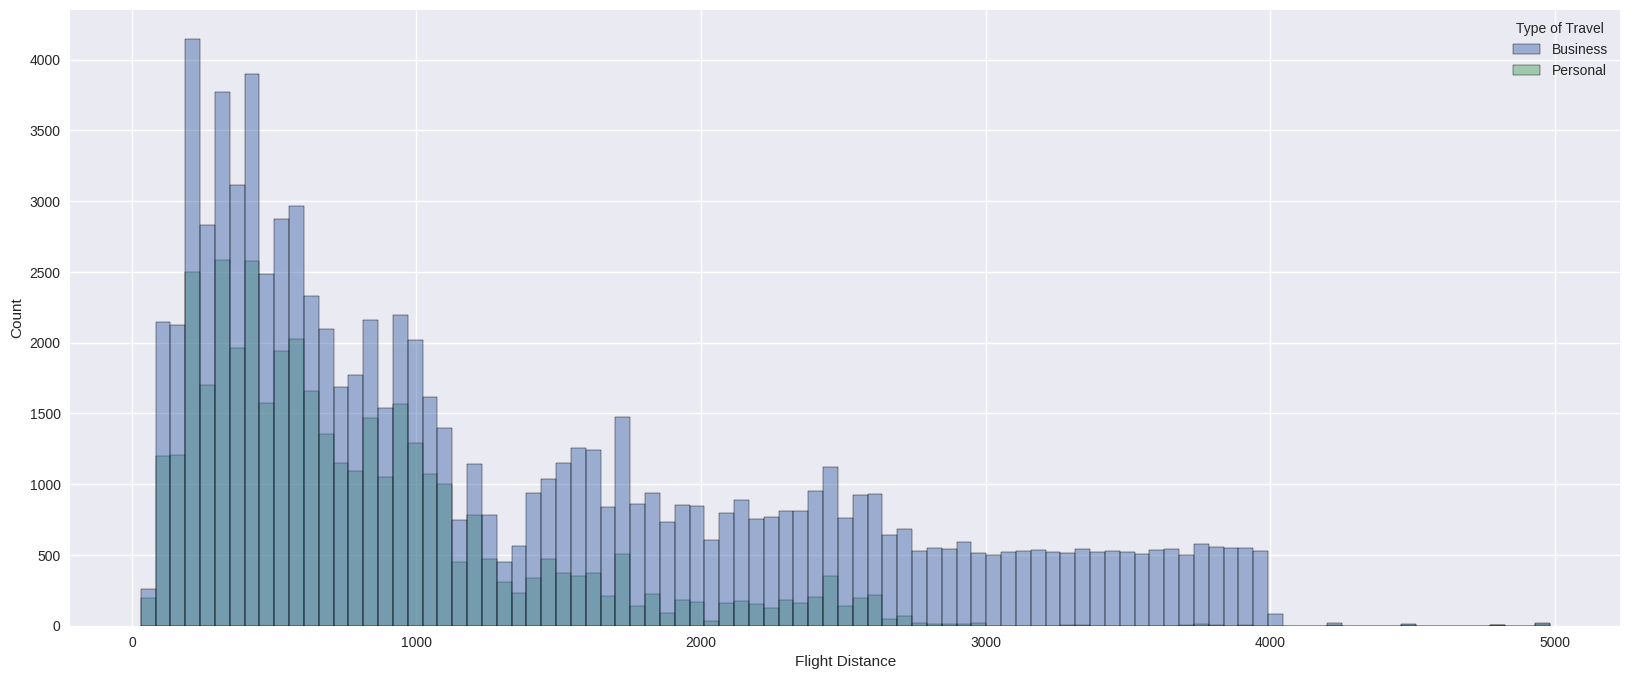

In [27]:
plt.figure(figsize=(20,8))
sns.histplot(x='Flight Distance', data=df,  hue='Type of Travel')

### From this plot we can see that some of the people who travel for business purposes fly for bigger distances 

## Departure Delay column

In [28]:
df['Departure Delay'].nunique()

466

<Axes: xlabel='Satisfaction', ylabel='Departure Delay'>

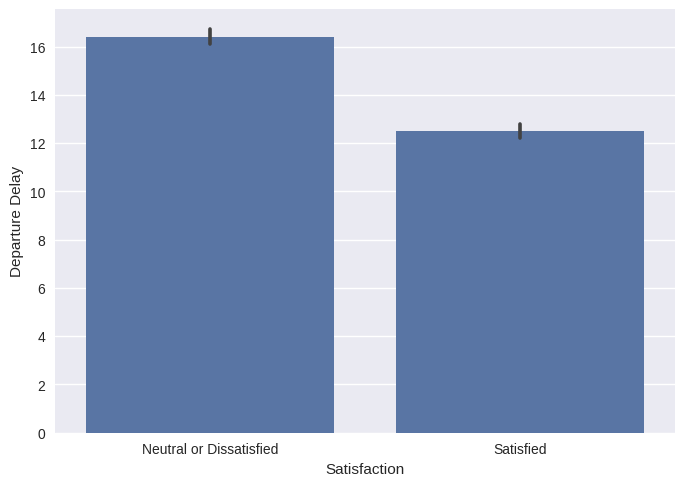

In [29]:
sns.barplot(x='Satisfaction', y='Departure Delay', data=df)

### Here we can see that the Departure Delay affects the satisfaction of the passengers as shown in the plot ,
### the more the delay is the less satisfied customers there is

## Arrival Delay column

In [30]:
df['Arrival Delay'].nunique()

472

<Axes: xlabel='Satisfaction', ylabel='Arrival Delay'>

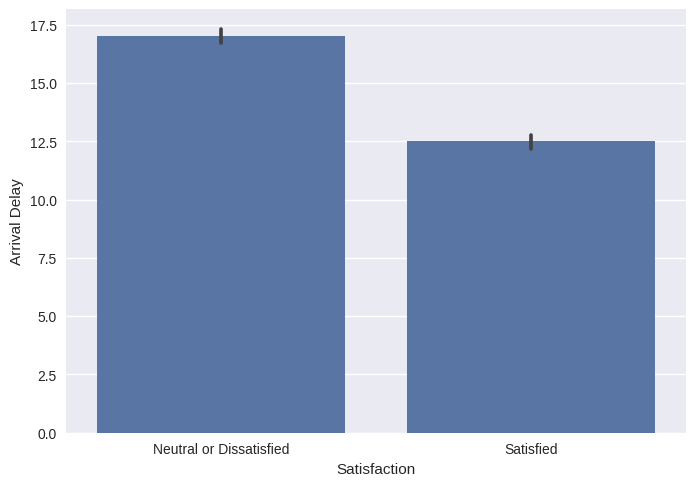

In [31]:
sns.barplot(x='Satisfaction', y='Arrival Delay', data=df)

### Similarly to the departure delay , the arrival delay also affects on the customer satisfaction 
### but here we can see that the arrival delay is larger on average than the departure delay

## Departure and Arrival Time Convenience column

In [32]:
df['Departure and Arrival Time Convenience'].value_counts()

Departure and Arrival Time Convenience
4    31880
5    27998
3    22378
2    21534
1    19409
0     6681
Name: count, dtype: int64

<Axes: xlabel='Departure and Arrival Time Convenience', ylabel='count'>

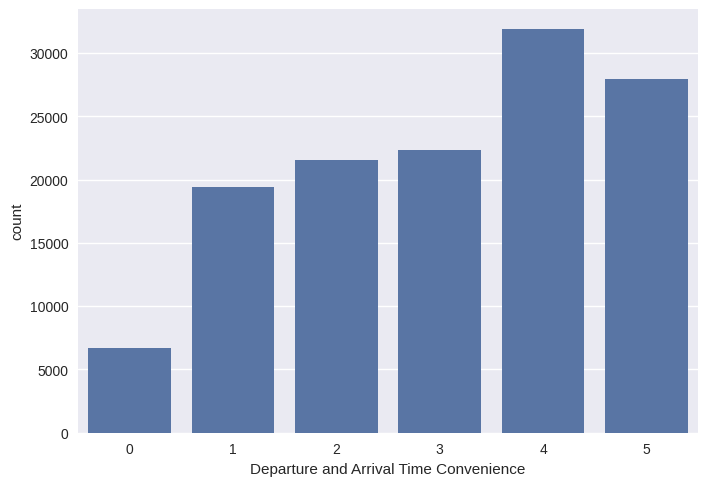

In [33]:
sns.countplot(x='Departure and Arrival Time Convenience',data=df)

### Most passengers ranked this 4 , 5 stars which is a good sign but there are still some who ranked it less

## Ease of Online Booking column

In [34]:
df['Ease of Online Booking'].value_counts()

Ease of Online Booking
3    30393
2    30051
4    24444
1    21886
5    17424
0     5682
Name: count, dtype: int64

<Axes: xlabel='Ease of Online Booking', ylabel='count'>

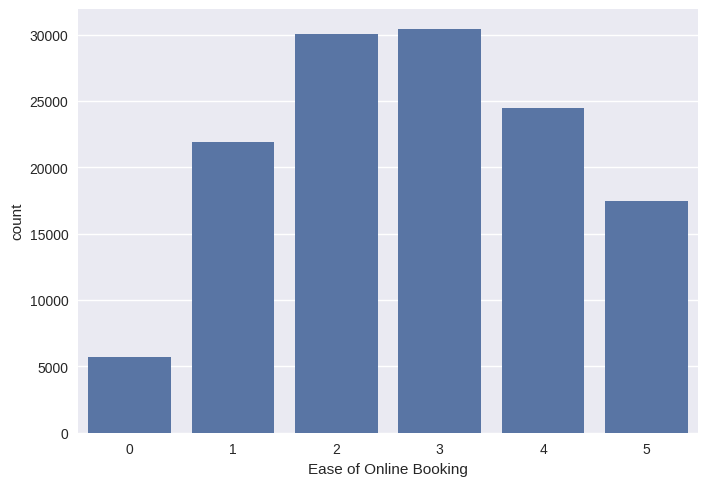

In [35]:
sns.countplot(x='Ease of Online Booking',data=df)

### Most passengers ranked this 2 or 3 which indicates that it needs improvement

<Axes: xlabel='Ease of Online Booking', ylabel='count'>

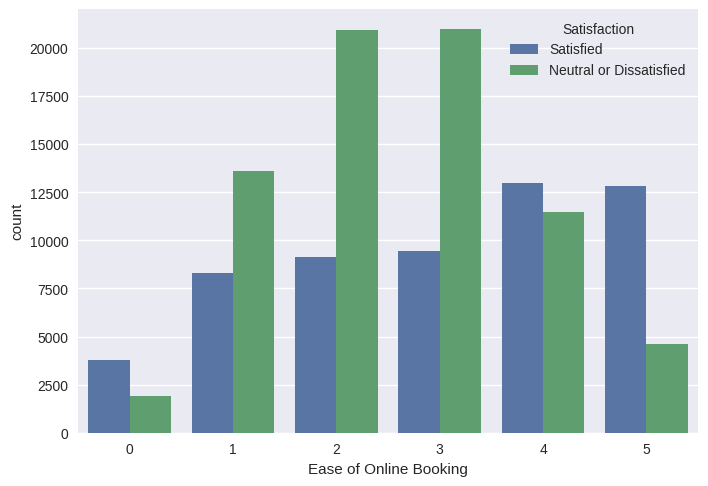

In [36]:
sns.countplot(x='Ease of Online Booking',data=df, hue='Satisfaction')

### Looks like there is a connection between this service and the total satisfaction rate as most of the people who ranked it 2 or 3 were not over all satisfied 

## Check-in Service column

In [37]:
df['Check-in Service'].value_counts()

Check-in Service
4    36333
3    35453
5    25883
1    16108
2    16102
0        1
Name: count, dtype: int64

<Axes: xlabel='Check-in Service', ylabel='count'>

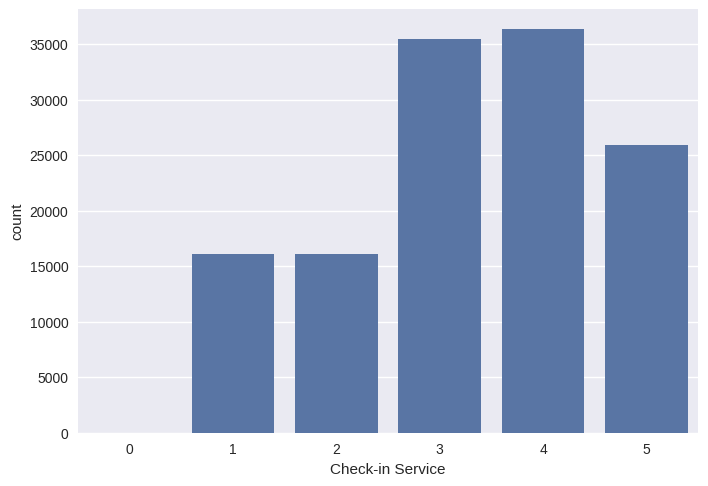

In [38]:
sns.countplot(x='Check-in Service',data=df)

### For the most part people seem to be pleased with this service

## Online Boarding column 

In [39]:
df['Online Boarding'].value_counts()

Online Boarding
4    38468
3    27117
5    26020
2    21934
1    13261
0     3080
Name: count, dtype: int64

<Axes: xlabel='Online Boarding', ylabel='count'>

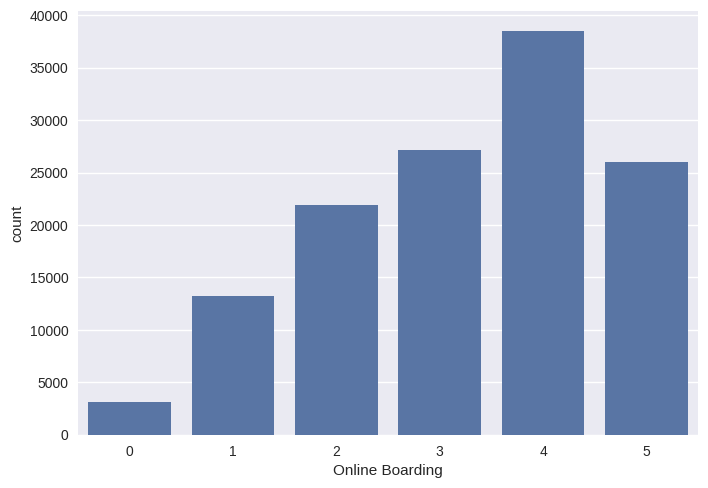

In [40]:
sns.countplot(x='Online Boarding',data=df)

<Axes: xlabel='Online Boarding', ylabel='count'>

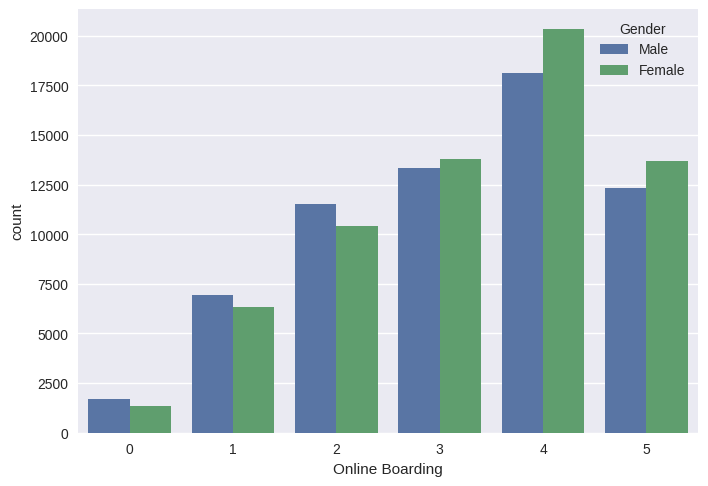

In [41]:
sns.countplot(x='Online Boarding',data=df,hue='Gender')

### In general it seems that passengers are satisfied with service but after comparing the scores based on gender it seems that more males are dissatisfied with it as they ranked it 1 or 2 more than females

## Gate Location column

In [42]:
df['Gate Location'].value_counts()

Gate Location
3    35717
4    30466
2    24296
1    21991
5    17409
0        1
Name: count, dtype: int64

<Axes: xlabel='Gate Location', ylabel='count'>

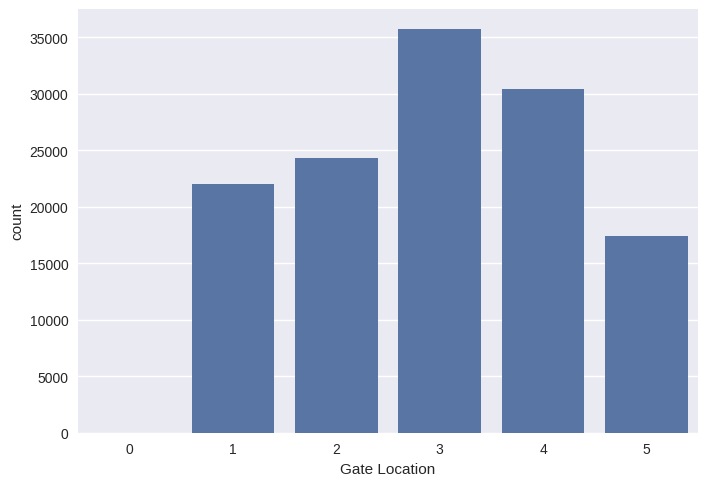

In [43]:
sns.countplot(x='Gate Location',data=df)

### Most of the people rated this 3 and 4 so i guess they are content with it

## On-board Service column

In [44]:
df['On-board Service'].value_counts()

On-board Service
4    38703
5    29492
3    28542
2    18351
1    14787
0        5
Name: count, dtype: int64

<Axes: xlabel='On-board Service', ylabel='count'>

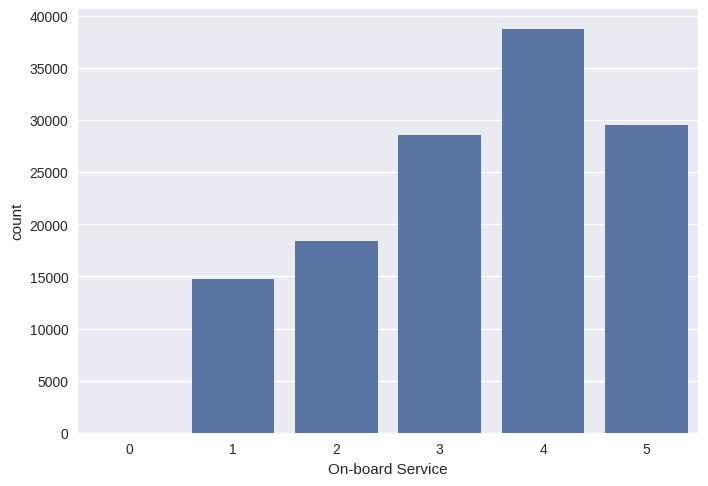

In [45]:
sns.countplot(x='On-board Service',data=df)

### For the most part people seem to be pleased with this service

<Axes: xlabel='On-board Service', ylabel='count'>

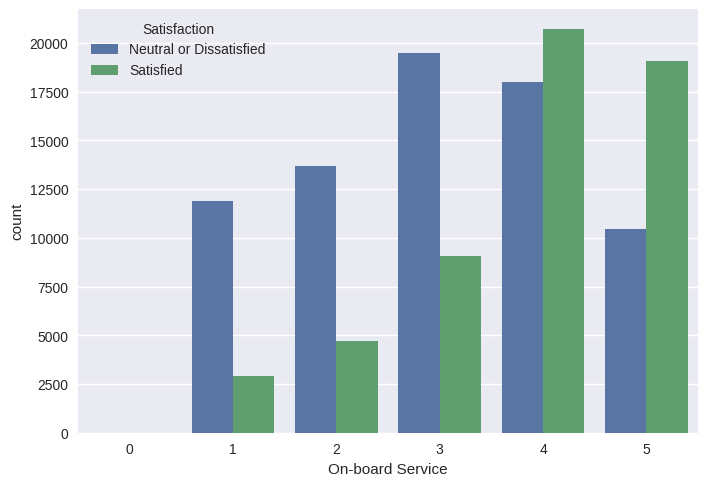

In [46]:
sns.countplot(x='On-board Service',data=df,hue='Satisfaction')

### As we can see from the plot , there is a great relation between the over all Satisfaction rate and the On-board Service as most of the people who were over all satisfied rated this 4 or 5 and most of the people that were not rated it less

<Axes: xlabel='On-board Service', ylabel='count'>

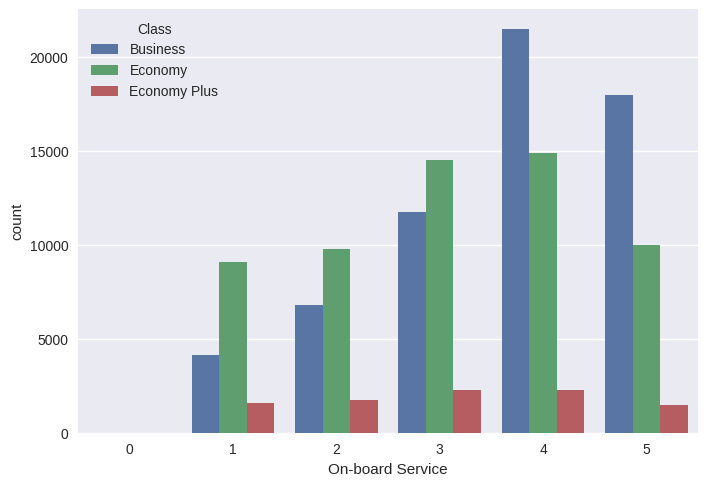

In [47]:
sns.countplot(x='On-board Service',data=df,hue='Class')

### As shown in the plot most of the people that rated this service 4 or 5 were from the business class but this makes some sense as the business class ticket costs more 

## Seat Comfort column

In [48]:
df['Seat Comfort'].value_counts()

Seat Comfort
4    39756
5    33158
3    23328
2    18529
1    15108
0        1
Name: count, dtype: int64

<Axes: xlabel='Seat Comfort', ylabel='count'>

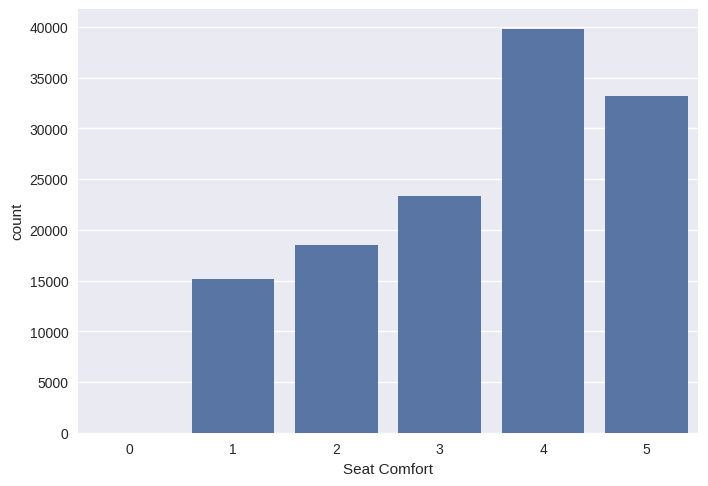

In [49]:
sns.countplot(x='Seat Comfort',data=df)

### Most people seem to be content with service also

<Axes: xlabel='Seat Comfort', ylabel='count'>

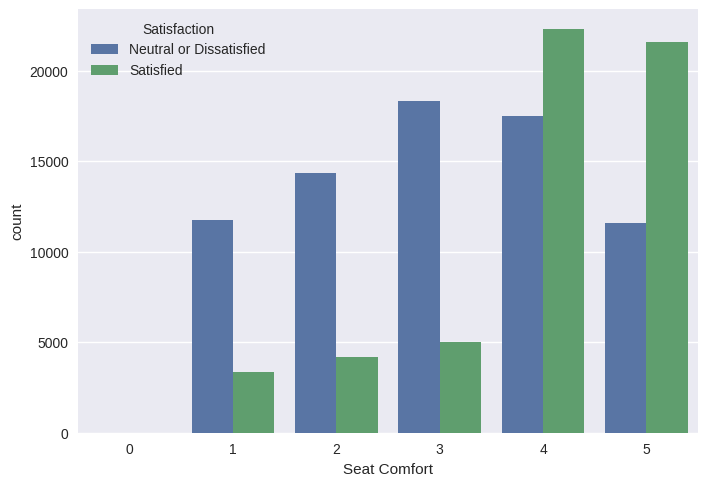

In [50]:
sns.countplot(x='Seat Comfort',data=df,hue='Satisfaction')

### Here we can see that this service also contibutes to the over all satisfaction rate 

<Axes: xlabel='Seat Comfort', ylabel='count'>

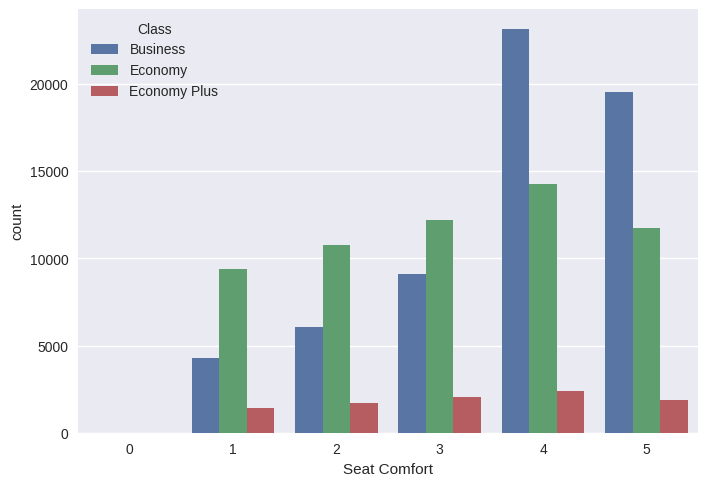

In [51]:
sns.countplot(x='Seat Comfort',data=df,hue='Class')

### Here we can see that most of the people that rated this service 4 or 5 are from the business class and we can conclude that the seats in that class are more comfortable which makes some sense because it costs more 

## Leg Room Service column

In [52]:
df['Leg Room Service'].value_counts()

Leg Room Service
4    35886
5    30905
3    25056
2    24540
1    12895
0      598
Name: count, dtype: int64

<Axes: xlabel='Leg Room Service', ylabel='count'>

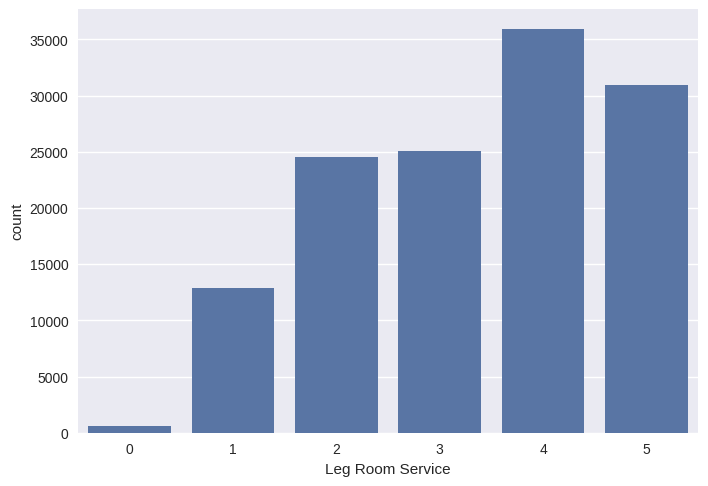

In [53]:
sns.countplot(x='Leg Room Service',data=df)

### Looks like that there is enough leg space but let's investigate this more througly

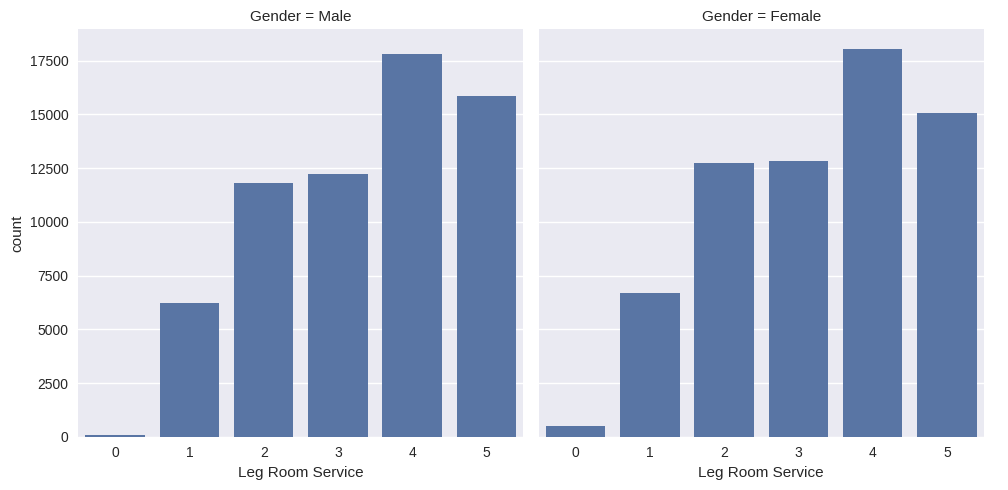

In [54]:
sns.catplot(x='Leg Room Service',data=df,kind = 'count',col = 'Gender')

### Here we can see that males and females rating on this are almost equal in each rate which is good because males are taller than females on average thus they need more leg space but let's investigate more

<Axes: xlabel='Class', ylabel='Leg Room Service'>

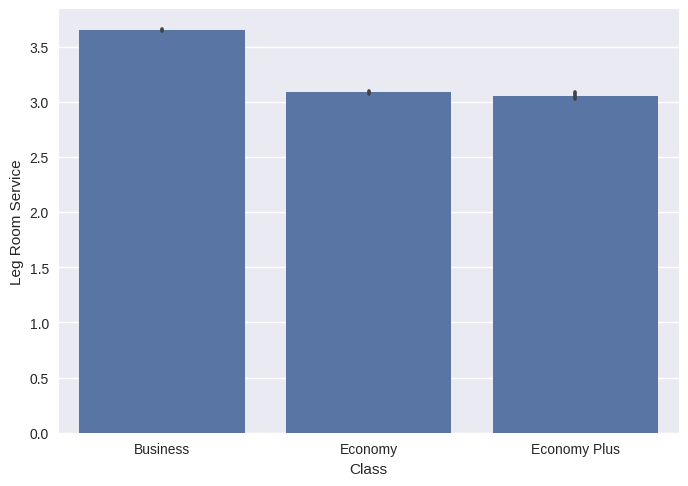

In [55]:
sns.barplot(x='Class',y='Leg Room Service',data=df)

### We can see here that the businesss class probably have more leg space as the average of business class rating in this service is slightly higher 

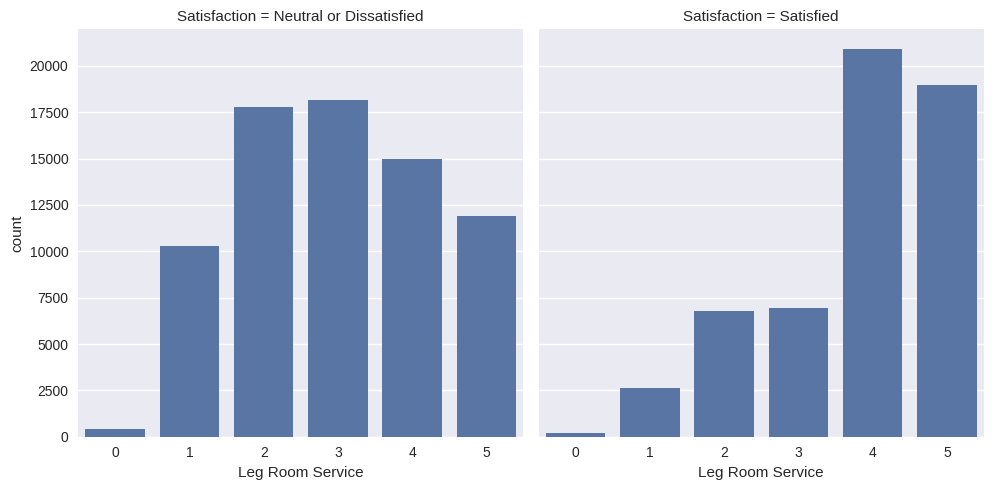

In [56]:
sns.catplot(x='Leg Room Service',data=df,kind = 'count',col = 'Satisfaction')

### Here we can see that this service also contibutes to the over all satisfaction rate

## Cleanliness column

In [57]:
df['Cleanliness'].value_counts()

Cleanliness
4    33969
3    30639
5    28416
2    20113
1    16729
0       14
Name: count, dtype: int64

<Axes: xlabel='Cleanliness', ylabel='count'>

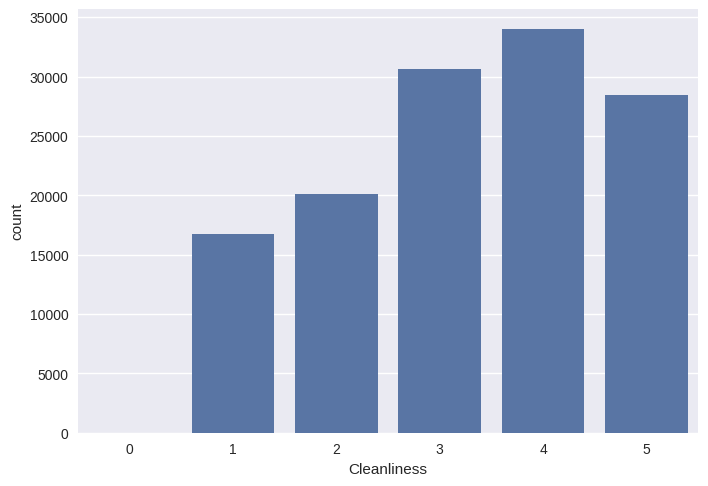

In [58]:
sns.countplot(x='Cleanliness',data=df)

### Most of the ratings are 4 and 5 so that's a good sign

<Axes: xlabel='Cleanliness', ylabel='count'>

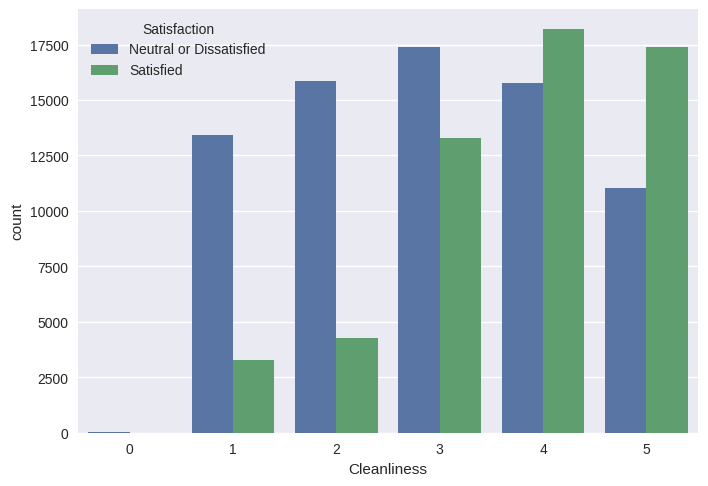

In [59]:
sns.countplot(x='Cleanliness',data=df,hue='Satisfaction')

### Here we can see that this service also contibutes to the over all satisfaction rate

## Food and Drink column

In [60]:
df['Food and Drink'].value_counts()

Food and Drink
4    30563
5    27957
3    27794
2    27383
1    16051
0      132
Name: count, dtype: int64

<Axes: xlabel='Food and Drink', ylabel='count'>

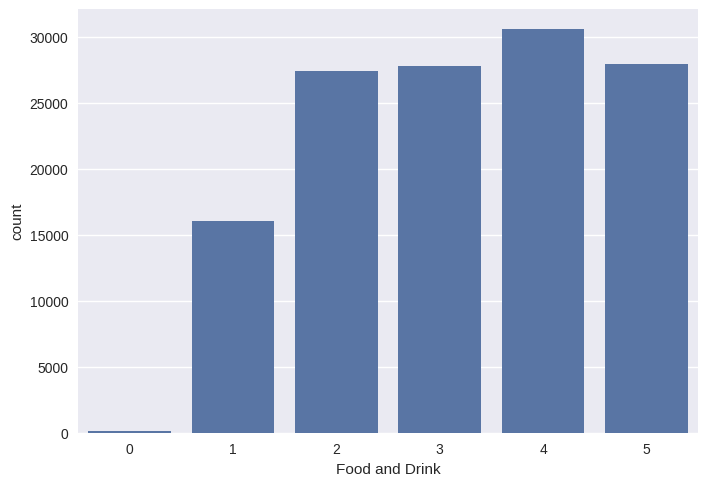

In [61]:
sns.countplot(x='Food and Drink',data=df)

### We can't conclude much from this plot so let's investigate some more 

<Axes: xlabel='Class', ylabel='Food and Drink'>

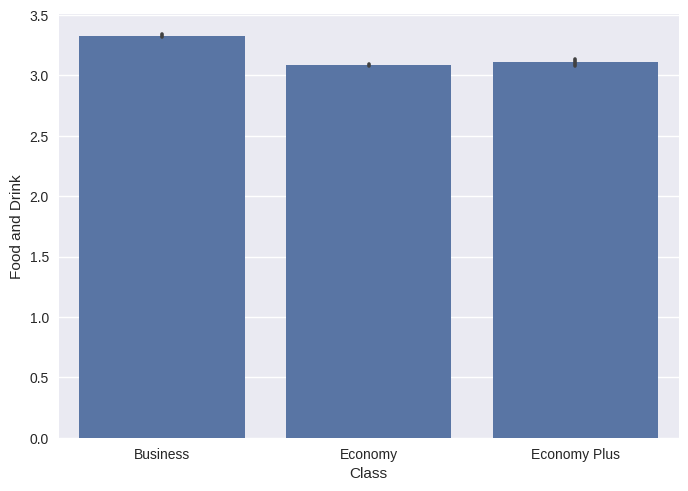

In [62]:
sns.barplot(x='Class',y='Food and Drink',data=df)

### We can see that the average rating for this service in busniss class is slightley higher than the rest

<Axes: xlabel='Food and Drink', ylabel='count'>

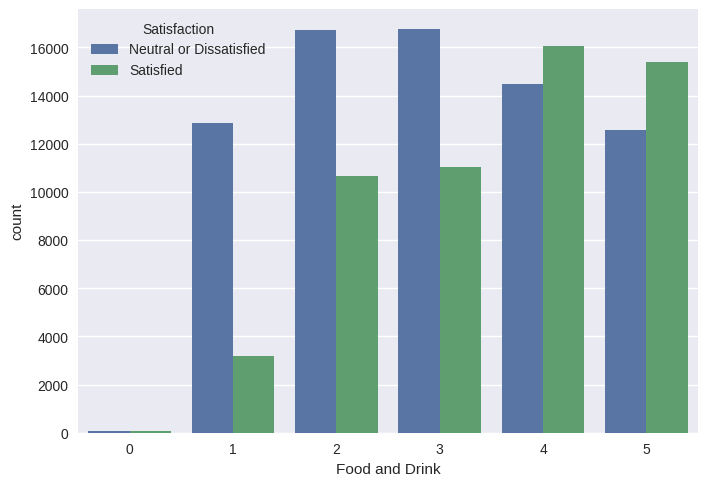

In [63]:
sns.countplot(x='Food and Drink',data=df,hue='Satisfaction')

### This service also contibutes greatly to the overall satisfaction rate

## In-flight Service column

In [64]:
df['In-flight Service'].value_counts()

In-flight Service
4    47323
5    34066
3    25316
2    14308
1     8862
0        5
Name: count, dtype: int64

<Axes: xlabel='In-flight Service', ylabel='count'>

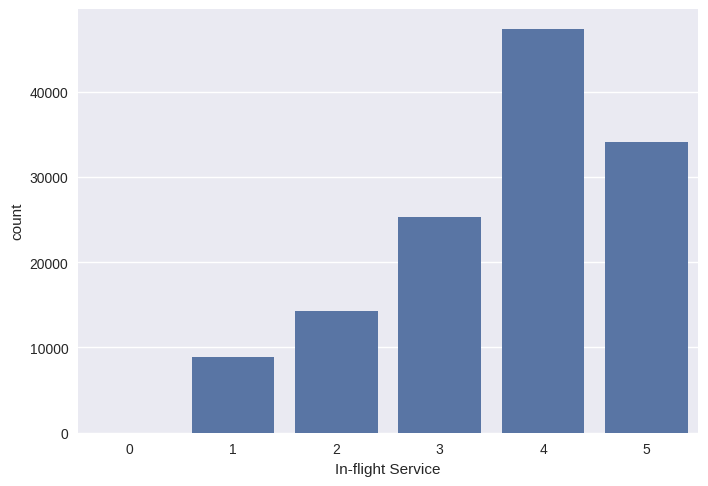

In [65]:
sns.countplot(x='In-flight Service',data=df)

### Most of the people rated this 4 or 5 which indicates that they are pleased with this service

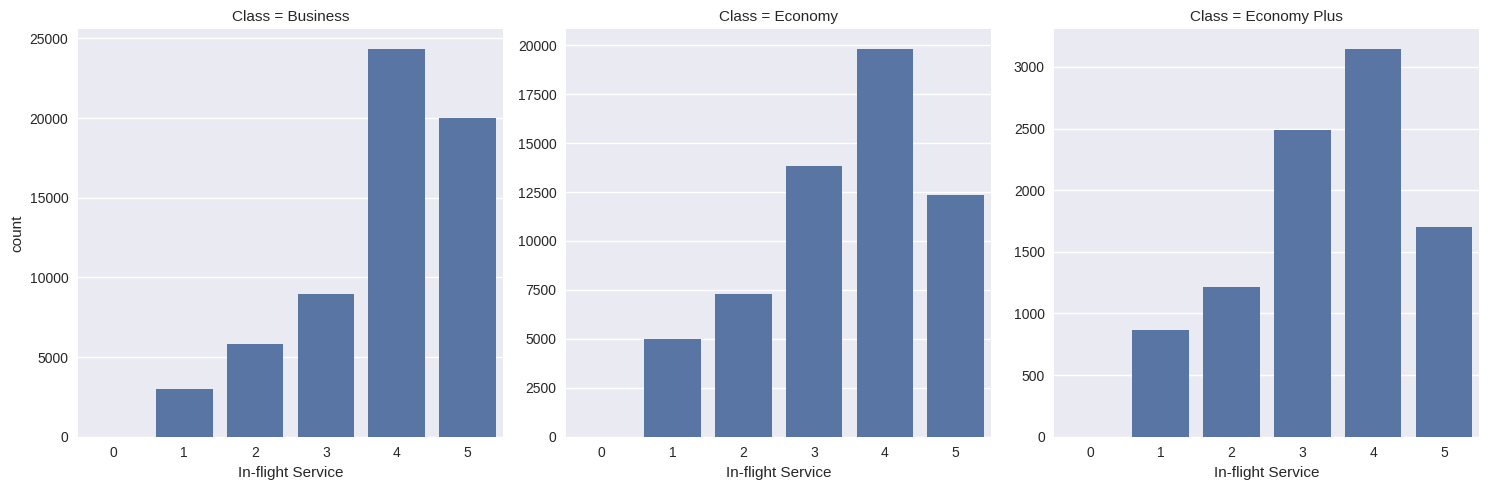

In [66]:
sns.catplot(x='In-flight Service',data=df,kind='count',col='Class',sharey=False)

### Looks like this service is similar for each class except for the business class the rating is slightley higher

## In-flight Wifi Service column

In [67]:
df['In-flight Wifi Service'].value_counts()

In-flight Wifi Service
2    32320
3    32185
4    24775
1    22328
5    14356
0     3916
Name: count, dtype: int64

<Axes: xlabel='In-flight Wifi Service', ylabel='count'>

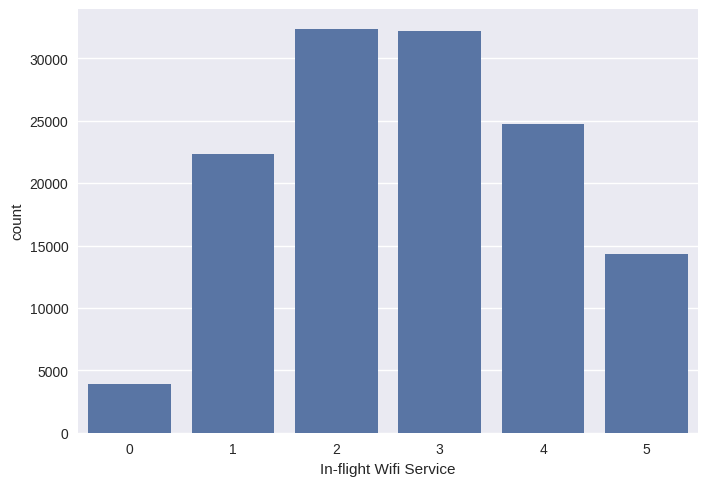

In [68]:
sns.countplot(x='In-flight Wifi Service',data=df)

### From the plot we can see that in general people are not very pleased with service but let's look more closely

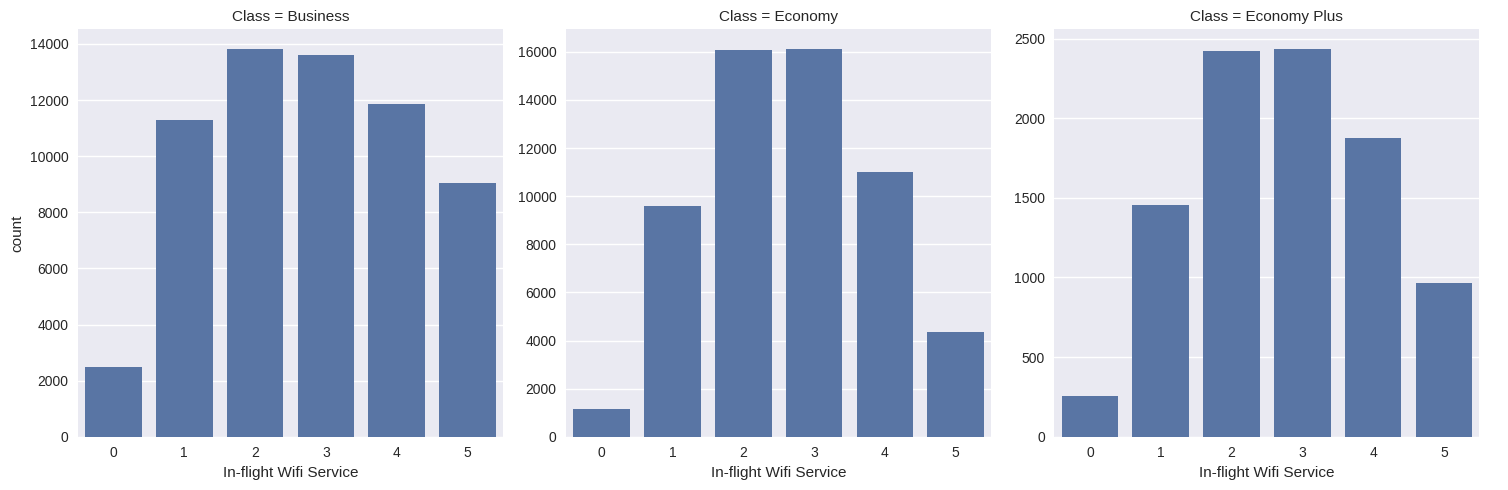

In [69]:
sns.catplot(x='In-flight Wifi Service',data=df,kind = 'count',col='Class',sharey=False)

### Travelers from all classes don't seem to be satisfied by this service but it shows more in the economy and economy plus calsses as in these classes people gave less 4 and 5 stars ranks than business class

<Axes: xlabel='In-flight Wifi Service', ylabel='count'>

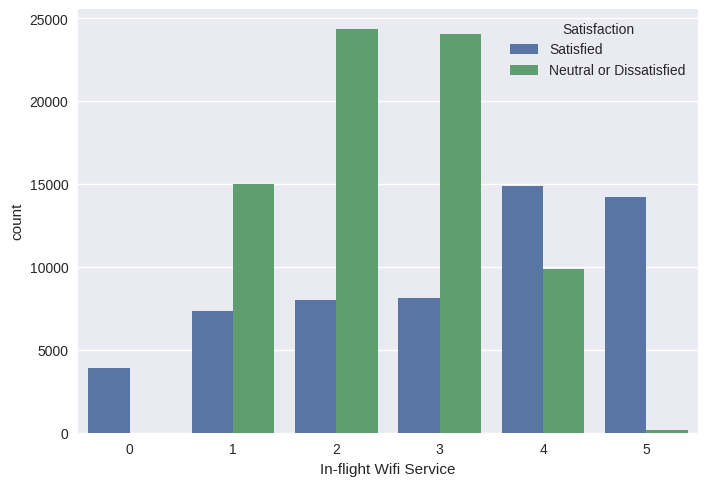

In [70]:
sns.countplot(x='In-flight Wifi Service',data=df,hue='Satisfaction')

### Looks like the overall satisfaction rate has a huge connection to this column as there is no travellers that were overall dissatisfied gave this service a 5 , looks like this service needs to be improved

## In-flight Entertainment column

In [71]:
df['In-flight Entertainment'].value_counts()

In-flight Entertainment
4    36791
5    31544
3    23884
2    21968
1    15675
0       18
Name: count, dtype: int64

<Axes: xlabel='In-flight Entertainment', ylabel='count'>

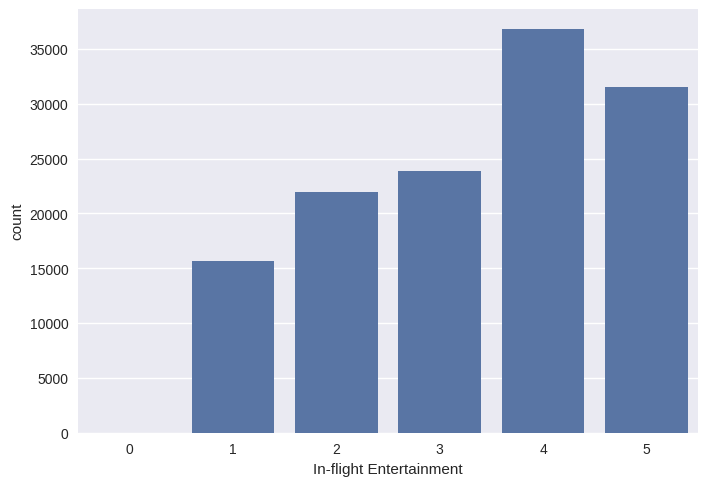

In [72]:
sns.countplot(x='In-flight Entertainment',data=df)

### It seems like people are generally pleased with this service

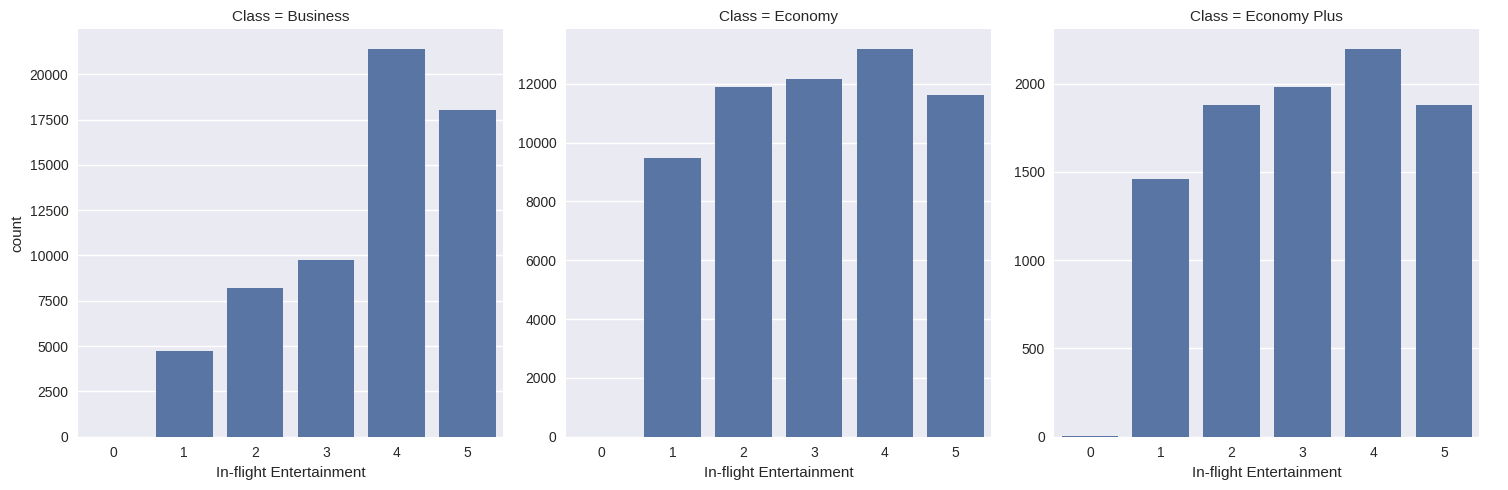

In [73]:
sns.catplot(x='In-flight Entertainment',data=df,kind='count',col='Class',sharey=False)

### The business class are more satisfied with this class more than the others

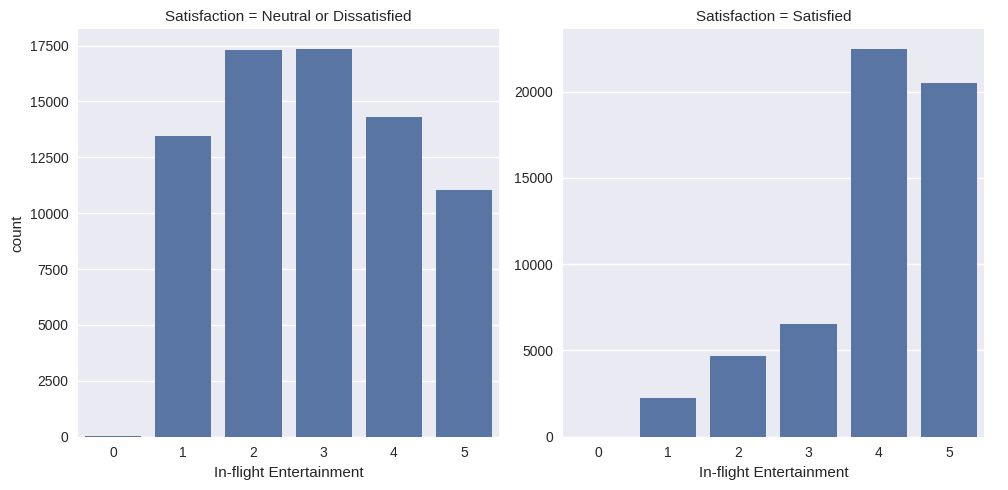

In [74]:
sns.catplot(x='In-flight Entertainment',data=df,kind='count',col='Satisfaction',sharey=False)

### This service also contibutes greatly to the overall satisfaction rate

## Baggage Handling column

In [75]:
df['Baggage Handling'].value_counts()

Baggage Handling
4    46761
5    33878
3    25851
2    14362
1     9028
Name: count, dtype: int64

<Axes: xlabel='Baggage Handling', ylabel='count'>

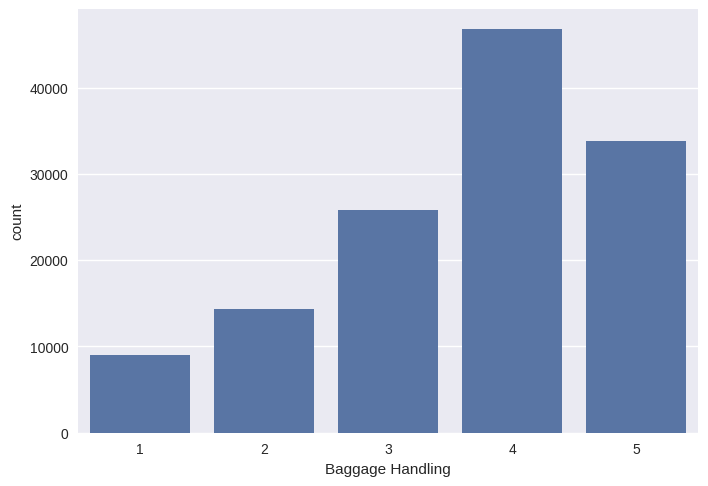

In [76]:
sns.countplot(x='Baggage Handling',data=df)

### Looks like most of the people are pleased with this service

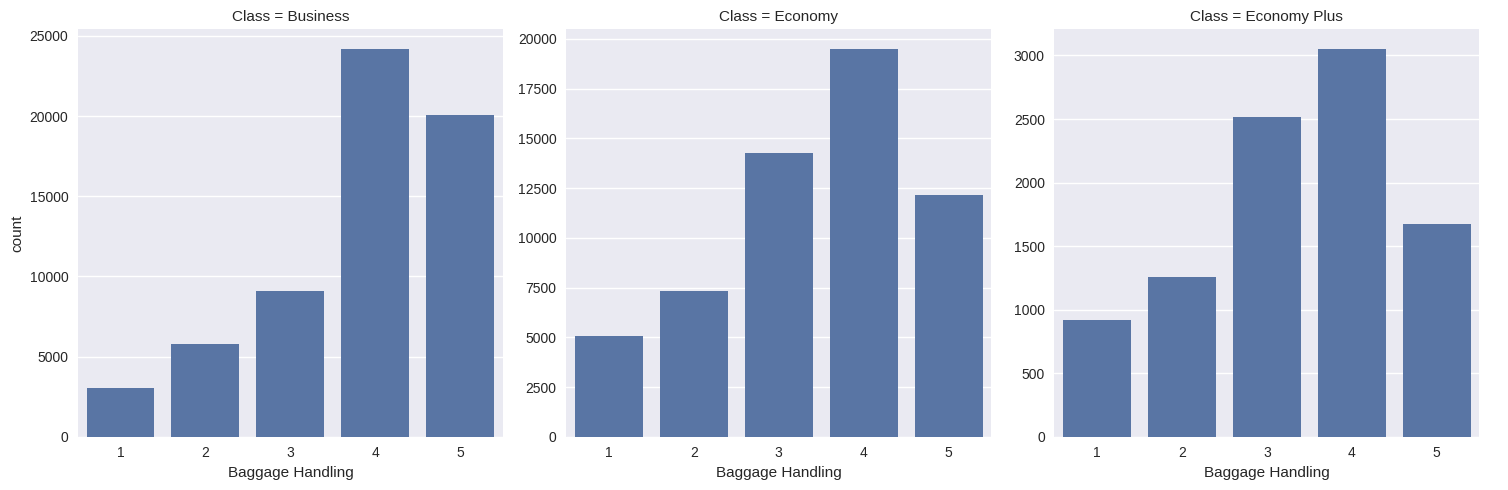

In [77]:
sns.catplot(x='Baggage Handling',data=df,kind='count',col='Class',sharey=False)

## Satisfaction column

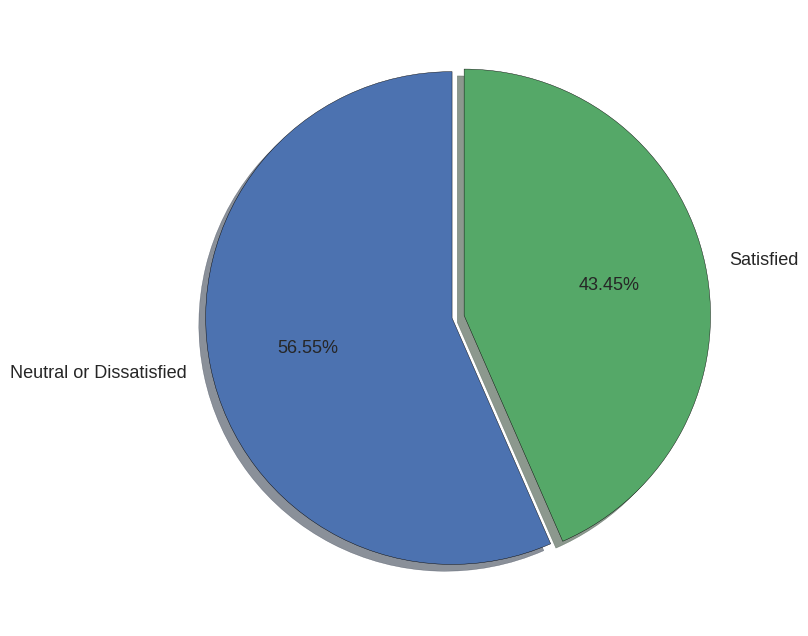

In [78]:
plt.figure(figsize=[8,8])
explode = [0,0.05]
labels= df['Satisfaction'].value_counts().index
values= df['Satisfaction'].value_counts().values
plt.pie(x = values, labels = labels, autopct= '%0.2f%%', wedgeprops = {'edgecolor':'black'},
        textprops ={'fontsize': 13}, shadow=True, explode=explode , startangle= 90)
plt.show()

### In this plot we can see that 55 percent of the travellers aren't over all satisfied but let's see which class is less satisfied with it 

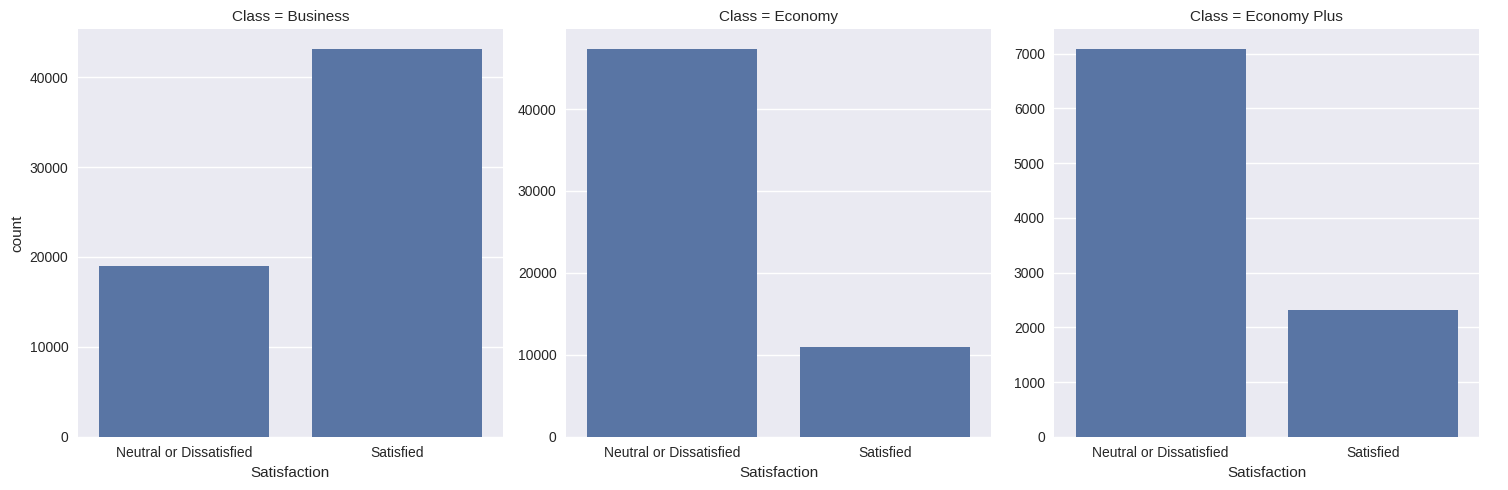

In [79]:
sns.catplot(x='Satisfaction',data=df,kind= 'count',col='Class',sharey=False)

### From this we can conclude that most ot the travellers whom are not pleased are from the Economy and Economy plus services 

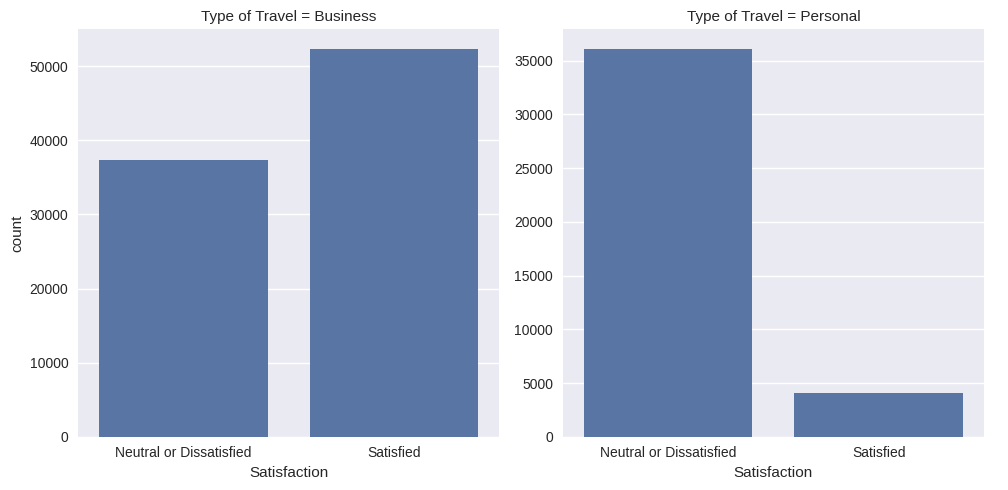

In [80]:
sns.catplot(x='Satisfaction',data=df,kind= 'count',col='Type of Travel',sharey=False)

### Here we can see that most of the people that travel for personal purposses are not satisfied overall , perhabs it's because they give more attention to details than the people who travel for business